# CODE SUPPORT

### Imports and settings

In [6]:
# Data extraction
from ucimlrepo import fetch_ucirepo

# Default
import pandas as pd
import numpy as np
import warnings

# Data viz
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
warnings.filterwarnings('ignore')

### Helper Functions

In [8]:
def uci_heart_data():
    '''
        Downloads dataset from the UCI Repository: Heart Disease.

        Parameters:
            None.
        
        Returns:
            DataFrame: heart disease dataset.
    '''
    heart_disease = fetch_ucirepo(name='Heart Disease')

    df_features = heart_disease.data.features
    df_target = heart_disease.data.targets
    df_full = pd.concat([df_features, df_target], axis=1)
    
    return df_full


#

# 0 BUSINESS UNDERSTANDING

### CRISP for Data Science

This is the methodology I use in my projects.

In [ ]:
# Loading crisp img
img = Image.open('img/crisp.png')

# Show
display(img)

### Understanding the Problem

Then we begin tackling the problem by understanding it.

Objective of this study:
    - Supporting the development of a heart disease prevention system!

My job as a Data Scientist is to create a predictive model to identify patients more likely to develop heart diseases.


Dataset available in the URL from UC Irvine (UCI) ML Repository: https://archive.ics.uci.edu/ml/datasets/heart+disease.
It's made of 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach.

### Understanding the Data

As I don't have support from a medical team, my decisions are solely made out of my dataset limited interpretation.

Below, we can see a table with the variables information summary, taken directly from the UCI ML Repository.

In [ ]:
# Loading data_features img
img = Image.open('img/dataset_variables.png')

# Show
display(img)

The Target feature also have this extra info:

num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

Because we have the Target feature, it's possible to use supervised models to predict whether or not new patients are prone to heart diseases.

The next steps are Data Extraction and Data Cleaning. We can better understand the data he have by diving into it.

In [ ]:
# Loading timeline img
img = Image.open('img/timeline.png')

# Show
display(img)

# 1 DATA EXTRACTION

In [12]:
# Downloading the dataset from UCI.
df1 = uci_heart_data()

# 2 DATA CLEANING

In [13]:
# Now we begin to understand how the dataset was built in more depth.
df2 = df1.copy()

### 2.1 Data Description

In [ ]:
# Just taking a look at the dataframe.
df2.head(3)

In [ ]:
# Checking dataframe size.
print( 'Rows: {}'.format( df2.shape[0] ) )
print( 'Cols: {}'.format( df2.shape[1] ) )

In [ ]:
# Displaying information about variables types and missing values.
type_value_analysis = pd.concat(
    [df2.dtypes, df2.isna().sum()], 
    axis=1, 
    keys=['Data Types', 'Missing Values'])
print(type_value_analysis)

### 2.2 Missing Values

In [ ]:
# Trying to understand the missing values.
df2[(df2['ca'].isna()) | (df2['thal'].isna())]

In [18]:
# I don't have any other information that could help determine the missing values 
# for 'ca' (flouroscopy result) or 'thal' (whatever this is). 
# 
# The decision here is to drop them. It's just 2.3% of our dataset, we'll survive.
df2 = df2.dropna()

### 2.3 Data Types

In [ ]:
# We have to take a look in the variables with data type float64, as the 
# int64 alreary have their values determined by the nature of its type.
# 
# These are 'oldpeak', 'ca' and 'thal'. Let's check their values. 
# 
# P.S.: UCI Repository says that 'oldpeak' and 'ca' are integer and 'thal' 
# is categorical.
unique_values_dict = {
    'oldpeak': list(df2['oldpeak'].unique()),
    'ca': list(df2['ca'].unique()),
    'thal': list(df2['thal'].unique())
}

for i in unique_values_dict:
    print('{}: {}'.format(i, unique_values_dict[i]))

In [20]:
# As we can see, 'ca' and 'thal' can be stored as integer. But, contrary to 
# the UCI recommendation, 'oldpeak' is indeed float.
variables_to_integer = ['ca', 'thal']

for i in variables_to_integer:
    df2[i] = df2[i].astype('int64')

### 2.4 Identifying Categorical and Numerical Data

In [ ]:
# Let's display unique values for each variable. Then we can decide on
# the nature of the data attributes.
attributes = list(df2.columns)
attributes_dict = {}

for att in attributes:
    attributes_dict[att] = list(df2[att].unique())

for i, j in attributes_dict.items():
    print('{}: {}'.format(i, j))

In [22]:
# The values for 'num' are not as expected from the data description from UCI.
# As we should have only 0 or 1, for False and True.

In [23]:
# Complete list of attributes:
attributes = list(df2.columns)

# For the numerical attributes, we can identify:
num_attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# And for the categorical ones, we have:
cat_attributes = [att for att in attributes if att not in num_attributes]

### 2.5 Adjusting Values

In [24]:
# As we saw, 'num' values are not as expected. We can follow 
# with 0 as 0, but 1, 2, 3, 4 as 1. 
# If I'd take a guess, it may identify from which of the four
# databases these positives come from.
df2.loc[df2['num'] > 0, 'num'] = 1

### 2.6 Identifying Outliers

In [ ]:
# Plotting histogram to identify weird patterns.
df2[num_attributes].hist(bins=20, figsize=(10, 8));

In [ ]:
# Plotting histogram to identify weird patterns.
df2[cat_attributes].hist(bins=20, figsize=(10, 8));

In [27]:
# Everything looks fine

# 3 EXPLORATORY DATA ANALYSIS

In [28]:
# It's adventure time.
df3 = df2.copy()

### 3.1 Hypothesis Creation 

In [ ]:
# NUMERICAL ATTRIBUTES
# 1. age - Risk patients tend to be older;

# 2. trestbps - Risk patients are more common to have higher resting
# blood pressure;

# 3. chol - It's more common to find high serum cholesterol patients
# among the risk group;

# 4. thalach - maximum heart rate achieved higher for risk patients,
# athletes tend to have lower heart rate overall;

# 5. oldpeak - ST segment instability are common in patients with heart
# disease.


# CATEGORICAL ATTRIBUTES
# 6. sex - Women (0) take more care of themselves and see doctors more 
# often, meaning lower risk of developing diseases in general;

# 7. cp - chest pain (1, 2, 3) may indicate problems around the chest, 
# anginal (1, 2) often indicate a heart disease (value 4 should be more 
# common in healthy patients);

# 8. fbs - high sugar (1) is usually related to heart diseases;

# 9. restecg - abnormal (1) and compromised (2) ECG results should be
# more often on risk patients;

# 10. exang - angina by exercising (1) should indicate risk;

# 11. slope - ST slope should be flat (2), most important cause of
# ST segment abnormality is myocardial ischaemia or infarction 
# (source: litfl.com/st-segment-ecg-library/ accessed in 2024-sep-07);

# 12. ca - I don't know what result we should get, let's assume
# that lower vessels mean higher risk;

# 13. thal - normal (3) means lower risk, defects (6, 7) should be 
# more common in risk patients.


### 3.2 Descriptive Analysis for each Variable

#### 3.2.1 Numerical Attributes

##### Univariate Analysis

In [ ]:
# Central Tendency
ct1 = pd.DataFrame( df3[num_attributes].apply( np.mean ) ).T
ct2 = pd.DataFrame( df3[num_attributes].apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( df3[num_attributes].apply( np.std ) ).T
d2 = pd.DataFrame( df3[num_attributes].apply( min ) ).T
d3 = pd.DataFrame( df3[num_attributes].apply( max ) ).T
d4 = pd.DataFrame( df3[num_attributes].apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df3[num_attributes].apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( df3[num_attributes].apply( lambda x: x.kurtosis() ) ).T

summary = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
summary.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

summary

In [30]:
# In general, we have distributions close to Normal, with attention
# to 'chol' with high kurtosis, indicating a high peak around the mean value.
# And 'oldpeak' with high positive skewness, showing its tendency to lower
# values, and high kurtosis, also highlighting a great peak.

In [ ]:
df3[num_attributes].hist( bins=80 );

In [41]:
# We can see an accumulation of 'oldpeak' in point zero and
# this can be investigated further.

##### Bivariate Analysis

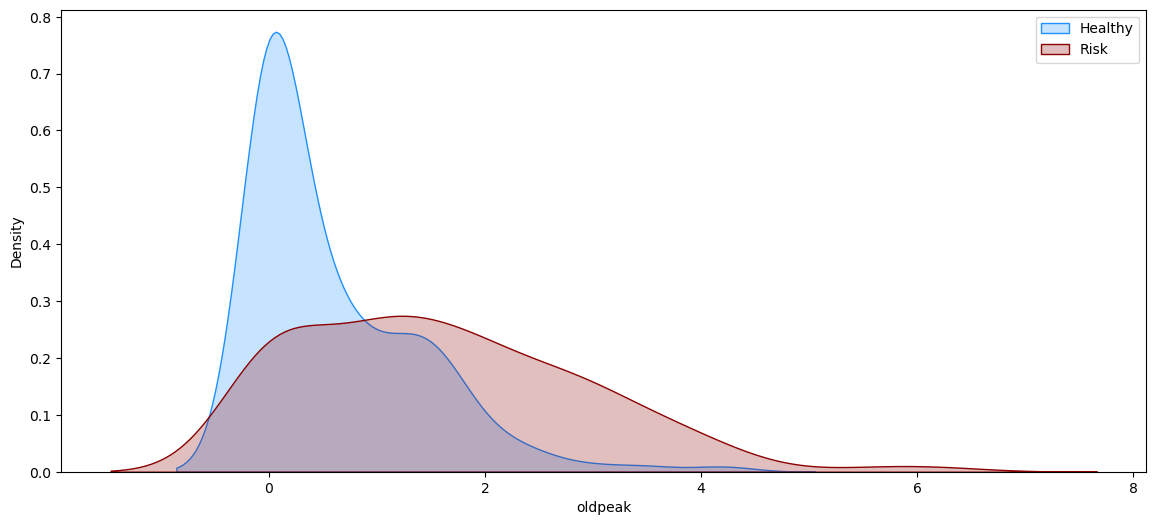

In [65]:
# 'oldpeak' analysis just to get a hang of it.
# Figure size.
plt.figure(figsize=(14, 6))

# Plot for healthy patients.
sns.kdeplot(df3.loc[df3['num'] == 0, 'oldpeak'], label='Healthy', color='dodgerblue', shade=True)

# Plot for risk patients.
sns.kdeplot(df3.loc[df3['num'] == 1, 'oldpeak'], label='Risk', color='darkred', shade=True)

# Show legend and graph.
plt.legend()
plt.show()

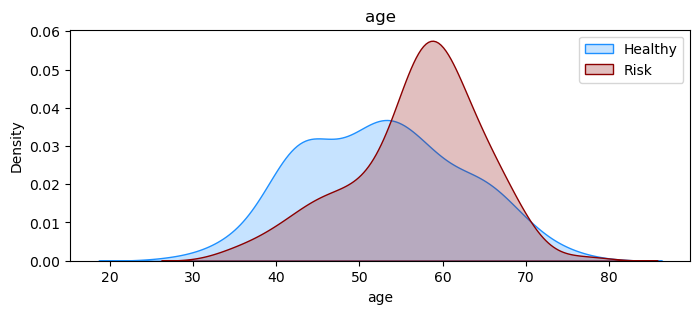

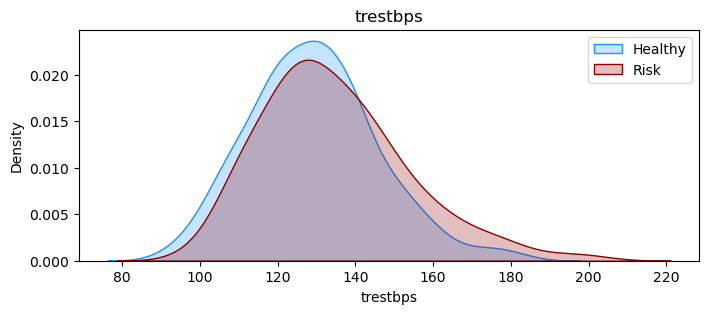

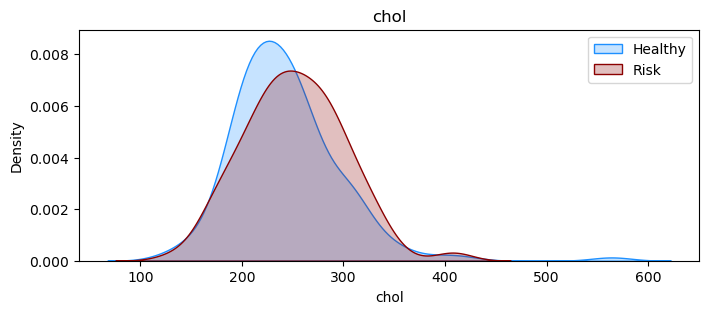

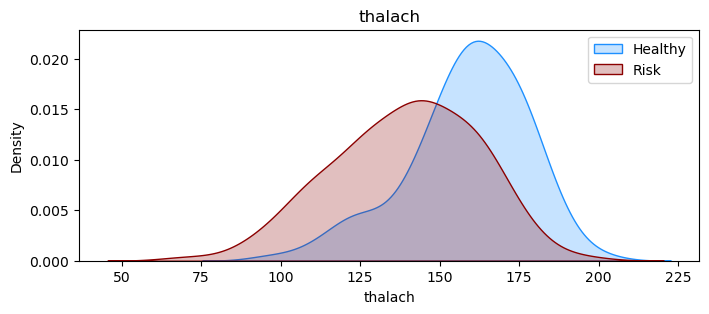

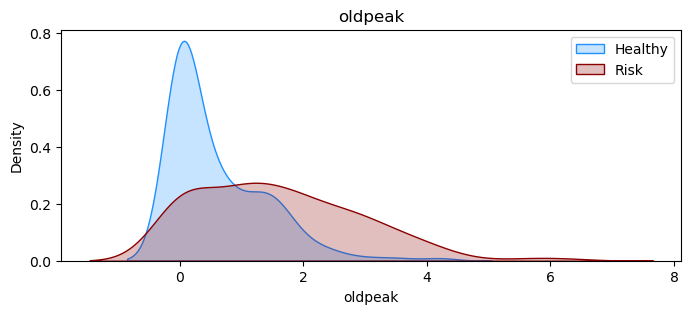

In [56]:
# We can see that 'oldpeak' serves as a good indicator for heart health.
# From that, we can generalize and see how the other variables behave too.
for att in num_attributes:
    # Figure settings.
    plt.figure(figsize=(8, 3))

    # Plots for healthy and risk patients
    sns.kdeplot(df3.loc[df3['num'] == 0, att], label='Healthy', color='dodgerblue', shade=True)
    sns.kdeplot(df3.loc[df3['num'] == 1, att], label='Risk', color='darkred', shade=True)

    # Show plots.
    plt.legend()
    plt.show()

In [36]:
# NUMERICAL ATTRIBUTES
# 1. age - Risk patients tend to be older;
#   * TRUE *

# 2. trestbps - Risk patients are more common to have higher resting
# blood pressure;
#   * TRUE * But the difference between groups is small.

# 3. chol - It's more common to find high serum cholesterol patients
# among the risk group;
#   * TRUE *

# 4. thalach - maximum heart rate achieved higher for risk patients,
# athletes tend to have lower heart rate overall;
#   * FALSE * Looks like healthy people has some extra power.

# 5. oldpeak - ST segment instability are common in patients with heart
# disease.
#   * TRUE * Very significant difference between gruops.

#### 3.2.2 Categorical Attributes

##### Uni and Bivariate Analysis

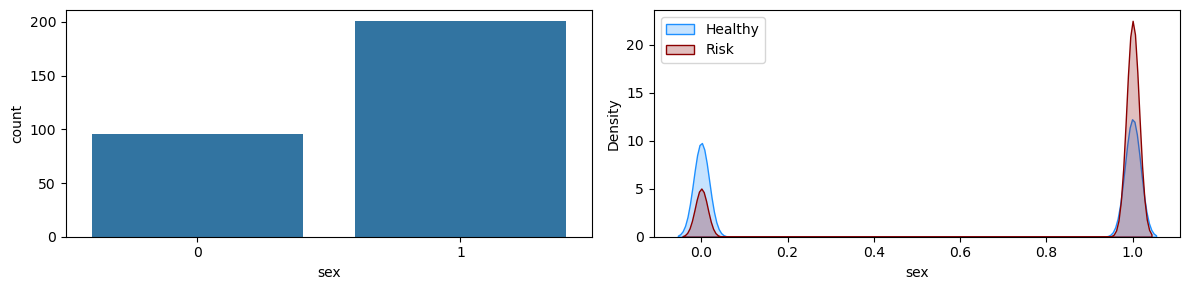

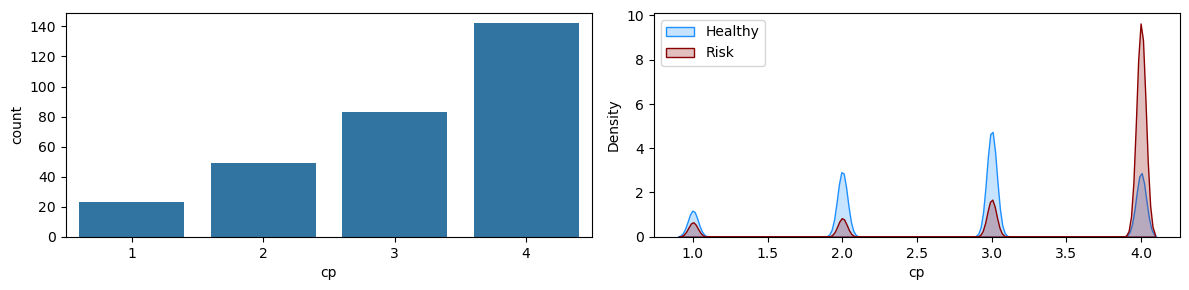

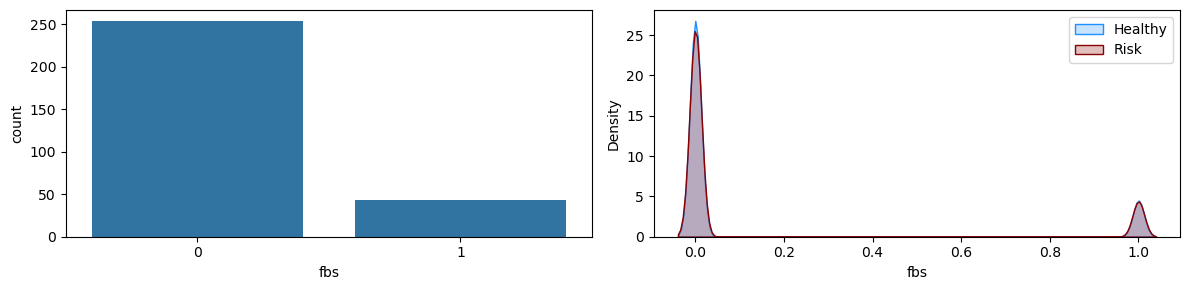

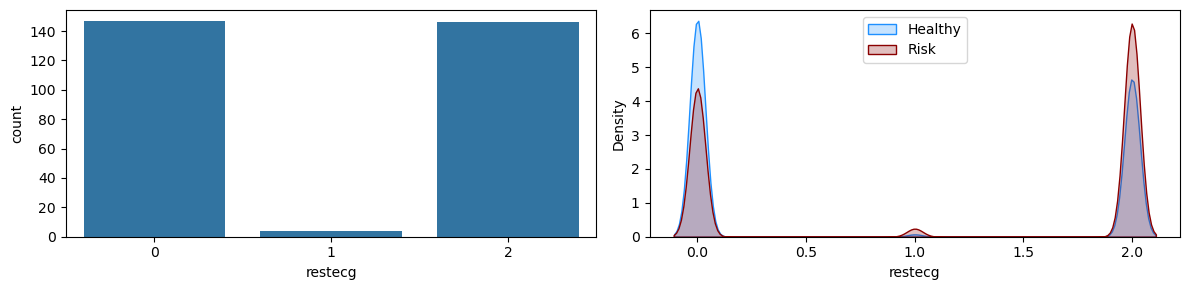

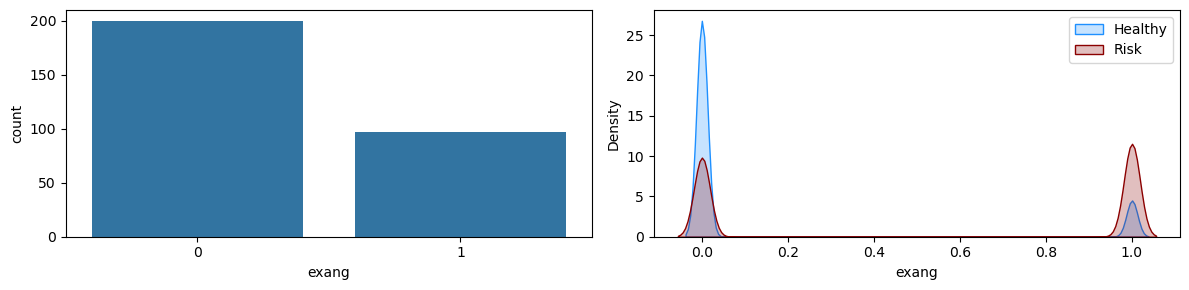

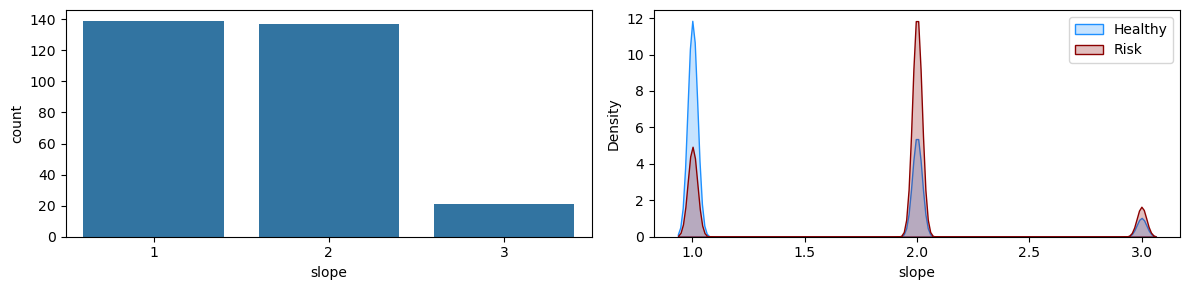

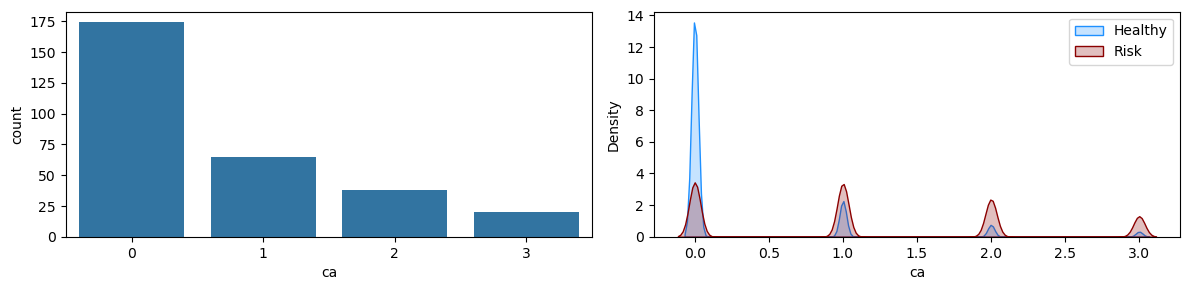

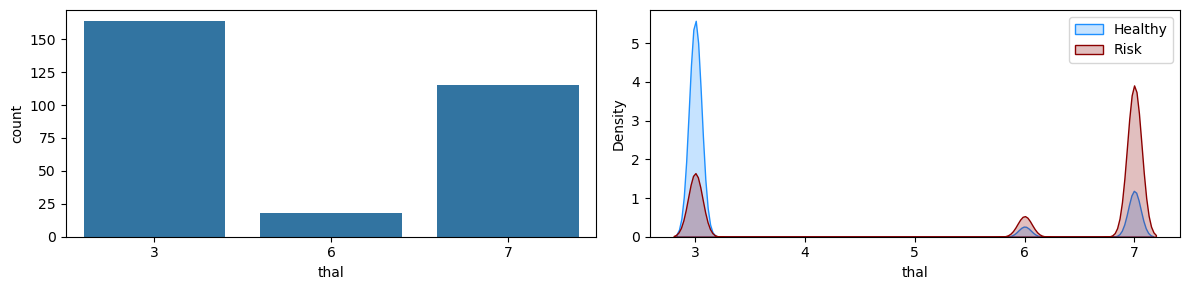

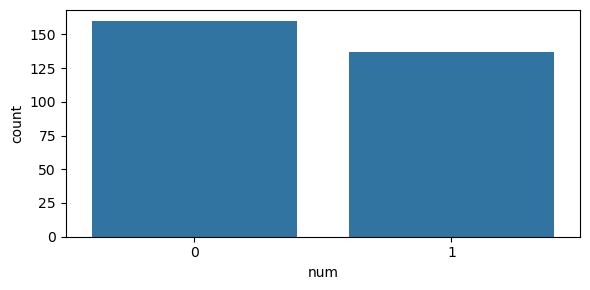

In [67]:
for att in cat_attributes:
    # Target variable plot.
    if att == 'num':
        fig, axes = plt.subplots(1, 1, figsize=(6, 3))
        sns.countplot(x=att, data=df3)

        # Show plot
        plt.tight_layout()
        plt.show()

        # Go to next att.
        continue

    # Categorical Features plot.
    # Figures settings.
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    # Count of the attribute.
    sns.countplot(x=att, data=df3, ax=axes[0])

    # Comparison to the target variable.
    sns.kdeplot(df3.loc[df3['num'] == 0, att], label='Healthy', color='dodgerblue', shade=True, bw_adjust=0.1, ax=axes[1])
    sns.kdeplot(df3.loc[df3['num'] == 1, att], label='Risk', color='darkred', shade=True, bw_adjust=0.1, ax=axes[1])

    # Show plots
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# CATEGORICAL ATTRIBUTES
# 6. sex - Women (0) take more care of themselves and see doctors more 
# often, meaning lower risk of developing diseases in general;
#   * TRUE *

# 7. cp - chest pain (1, 2, 3) may indicate problems around the chest, 
# anginal (1, 2) often indicate a heart disease (value 4 should be more 
# common in healthy patients);
#   * FALSE * eXCUSE ME, WTf? Just found out that ischemia can be 
# * "silent"... Scary.

# 8. fbs - high sugar (1) is usually related to heart diseases;
#   * FALSE * Little to no difference between groups.

# 9. restecg - abnormal (1) and compromised (2) ECG results should be
# more often on risk patients;
#   * TRUE *

# 10. exang - angina by exercising (1) should indicate risk;
#   * TRUE *

# 11. slope - ST slope should be flat (2), most important cause of
# ST segment abnormality is myocardial ischaemia or infarction 
# (source: litfl.com/st-segment-ecg-library/ accessed in 2024-sep-07);
#   * FALSE * Apparently, the expected slope while exercising is 
# * different from rest slope. Up slope is the healthy one.

# 12. ca - I don't know what result we should get, let's assume
# that lower vessels mean higher risk;
#   * FALSE * 0 is healthy, the others indicate risk.

# 13. thal - normal (3) means lower risk, defects (6, 7) should be 
# more common in risk patients.
#   * TRUE *


# Also, we have a lot of risk patients, almost half of our sample (> 50% diameter narrowing).

### 3.3 Multivariate Analysis